# Data Processing and Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
df = pd.read_csv('no_show_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.rename(index=str, columns={'Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.values[2]

array([4262962299951.0, 5642549, 'F', '2016-04-29T16:19:04Z',
       '2016-04-29T00:00:00Z', 62, 'MATA DA PRAIA', 0, 0, 0, 0, 0, 0,
       'No'], dtype=object)

In [7]:
#need to know distribution of age
df.loc[(df['Age'] <0) | (df['Age']>100)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## Plots of data

Text(0, 0.5, 'Number of patients')

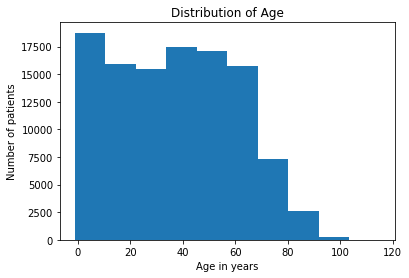

In [11]:
plt.hist(df.Age.values)
plt.title('Distribution of Age')
plt.xlabel('Age in years')
plt.ylabel('Number of patients')

In [13]:
#delete rows with abnormal value: Age = -1, 1 row was deleted
df.drop(df[df['Age']<0].index,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [15]:
df['No-show'] = df['No-show'].replace('No', 0)
df['No-show'] = df['No-show'].replace('Yes', 1)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [16]:
#No duplicate rows
sum(df.duplicated())

0

In [17]:
#Handle appointment date and scheduled date
df['WaitTime'] = pd.to_datetime(df['AppointmentDay'])- pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null int64
WaitTime          110526 non-null timedelta64[ns]
dtypes: float64(1), int64(9), object(4), timedelta64[ns](1)
memory usage: 13.5+ MB


In [19]:
df.WaitTime.describe()

count                     110526
mean      9 days 17:08:42.047952
std      15 days 05:51:31.240428
min            -7 days +10:10:40
25%            -1 days +15:41:32
50%              3 days 11:22:33
75%      14 days 07:41:37.750000
max            178 days 13:19:01
Name: WaitTime, dtype: object

In [21]:
df['waitdays'] = df['WaitTime'].apply(lambda x: x.days)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null int64
WaitTime          110526 non-null timedelta64[ns]
waitdays          110526 non-null int64
dtypes: float64(1), int64(10), object(4), timedelta64[ns](1)
memory usage: 19.3+ MB


In [23]:
df.loc[(df['waitdays'] <-1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,WaitTime,waitdays
27033,7.839273e+12,5679978,M,2016-05-10T10:51:53Z,2016-05-09T00:00:00Z,38,RESISTÊNCIA,0,0,0,0,1,0,1,-2 days +13:08:07,-2
55226,7.896294e+12,5715660,F,2016-05-18T14:50:41Z,2016-05-17T00:00:00Z,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-2 days +09:09:19,-2
64175,2.425226e+13,5664962,F,2016-05-05T13:43:58Z,2016-05-04T00:00:00Z,22,CONSOLAÇÃO,0,0,0,0,0,0,1,-2 days +10:16:02,-2
71533,9.982316e+14,5686628,F,2016-05-11T13:49:20Z,2016-05-05T00:00:00Z,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,-7 days +10:10:40,-7
72362,3.787482e+12,5655637,M,2016-05-04T06:50:57Z,2016-05-03T00:00:00Z,7,TABUAZEIRO,0,0,0,0,0,0,1,-2 days +17:09:03,-2


In [24]:
df.drop(df[df.waitdays < -1].index, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 16 columns):
PatientId         110521 non-null float64
AppointmentID     110521 non-null int64
Gender            110521 non-null object
ScheduledDay      110521 non-null object
AppointmentDay    110521 non-null object
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hypertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handicap          110521 non-null int64
SMS_received      110521 non-null int64
No-show           110521 non-null int64
WaitTime          110521 non-null timedelta64[ns]
waitdays          110521 non-null int64
dtypes: float64(1), int64(10), object(4), timedelta64[ns](1)
memory usage: 14.3+ MB


In [26]:
df.drop(['AppointmentID','ScheduledDay','AppointmentDay', 'WaitTime'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
AppointmentID    110521 non-null int64
Gender           110521 non-null object
Age              110521 non-null int64
Neighbourhood    110521 non-null object
Scholarship      110521 non-null int64
Hypertension     110521 non-null int64
Diabetes         110521 non-null int64
Alcoholism       110521 non-null int64
Handicap         110521 non-null int64
SMS_received     110521 non-null int64
No-show          110521 non-null int64
waitdays         110521 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.0+ MB


In [27]:
df.rename(index=str,columns={'No-show':'No_show'},inplace =True)
df.head()

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,waitdays
0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1


In [29]:
df.to_csv('no_show_data_clean.csv', index=False)

AttributeError: module 'seaborn' has no attribute 'plt'

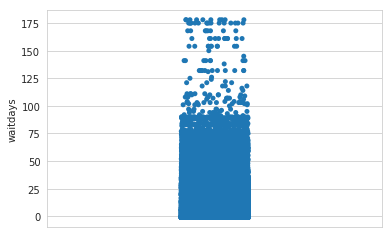

In [31]:
sb.set_style("whitegrid")
sb.stripplot(data = df, y = 'waitdays', jitter = True)
sb.plt.ylim(0, 500)
sb.plt.show()

In [32]:
df['Gender'] = df['Gender'].replace({'F':1, 'M':0})
df.head()

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,waitdays
0,5642903,1,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,5642503,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,5642549,1,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,5642828,1,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,5642494,1,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1


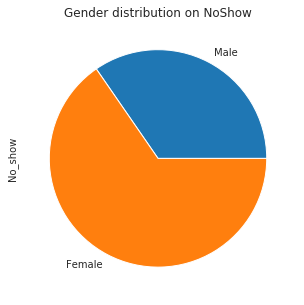

In [37]:
#Gender and no show
gender_noshow = df.groupby('Gender').sum()['No_show']
gender_noshow.plot.pie(figsize=(5,5),title = 'Gender distribution on NoShow', labels=['Male', 'Female'])

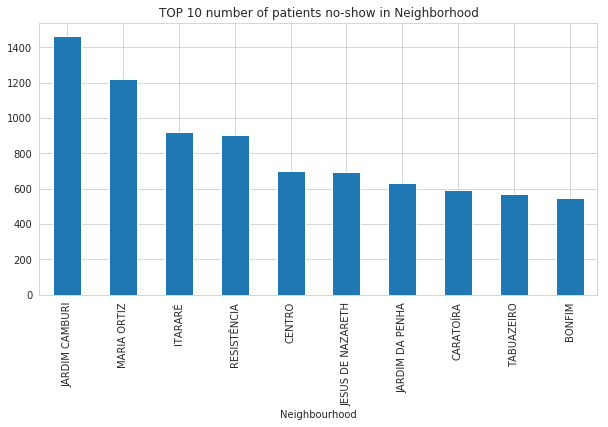

In [40]:
#Neighborhood and no show
Nei_noshow = df.groupby('Neighbourhood').sum()['No_show']
top10_noshow = Nei_noshow.sort_values(ascending=False).head(10)
top10_noshow.plot(kind='bar',figsize=(10,5),\
                  title = 'TOP 10 number of patients no-show in Neighborhood')

Text(0.5, 1.0, 'Women visit the doctor more often')

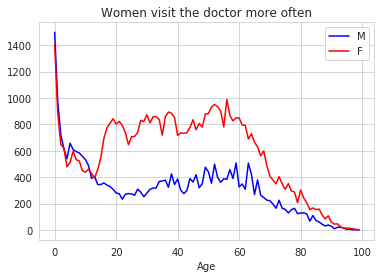

In [41]:
#Age and gender
df = df[df.No_show == 0]
range_df = pd.DataFrame()
range_df['Age'] = range(100)
men = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 0)]))
women = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 1)]))
plt.plot(range(100),men, 'b')
plt.plot(range(100),women, color = 'r')
plt.legend(['M','F'])
plt.xlabel('Age')
plt.title('Women visit the doctor more often')

In [48]:
df = pd.read_csv('no_show_data_clean.csv')

In [77]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            n = len(df[(df[item] == level) & (df.No_show == 0)])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

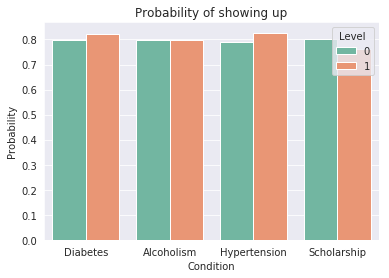

In [83]:
sb.barplot(data = probStatusCategorical(['Diabetes', 'Alcoholism', 'Hypertension', 'Scholarship']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

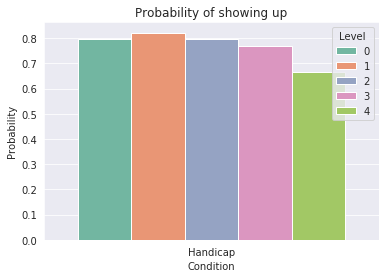

In [86]:
#Handicap
sb.barplot(data = probStatusCategorical(['Handicap']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

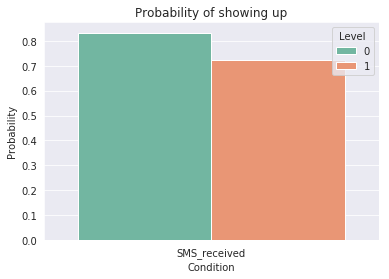

In [92]:
#SMS reminders
sb.barplot(data = probStatusCategorical(['SMS_received']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

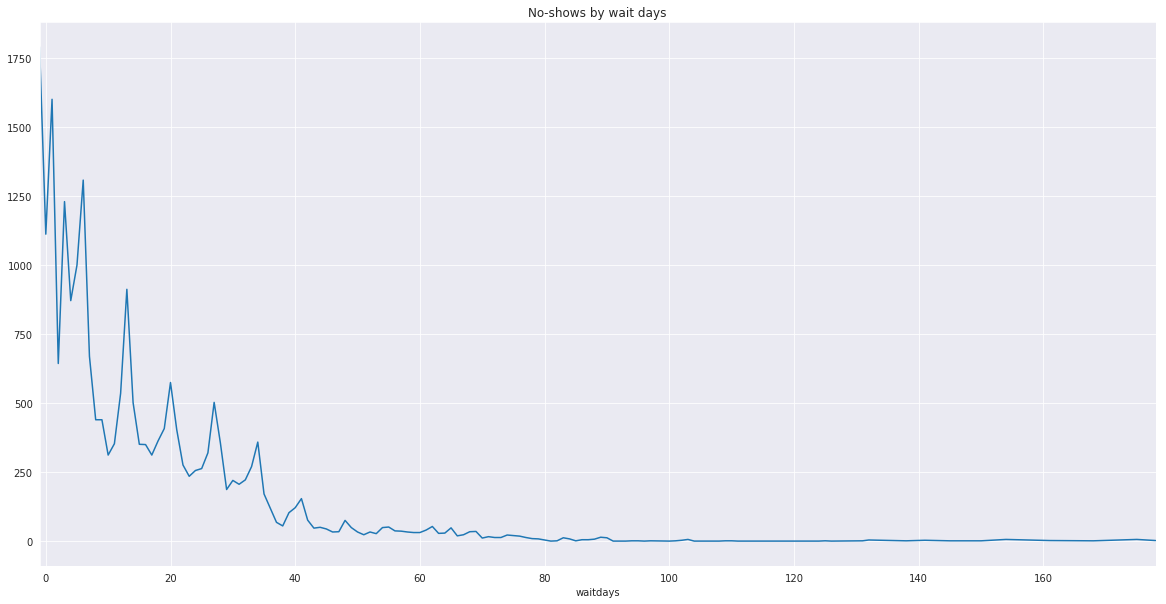

In [70]:
wait_noshow = df.groupby('waitdays').sum()['No_show']
wait_noshow.plot(figsize=(20,10),title='No-shows by wait days')
